# K-Nearest Neighbours

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline


In [90]:
df = pd.DataFrame()

df = pd.read_csv('data/Social_Network_Ads.csv')

df.head()

#df.isnull().values.any()
#df.isnull().sum()
# is missing
# df.isnull().sum().sum()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [91]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

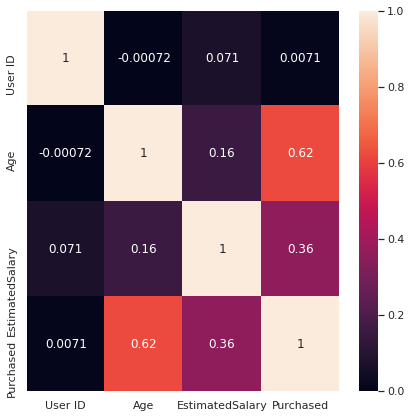

In [105]:
import seaborn as sns
sns.set()

plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)

In [85]:
#df.iloc[:, [2, 3]]

In [93]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Splitting the dataset into the Training set and Test set

# todo: verify if result improves applying scaling before split
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#k = 7
k = 11
kclassifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Predicting the Test set results
y_pred = kclassifier.predict(X_test)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, kclassifier.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))


print(metrics.classification_report(y_test, kclassifier.predict(X_test)))


Train set Accuracy:  0.9125
Test set Accuracy:  0.925
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



<AxesSubplot:>

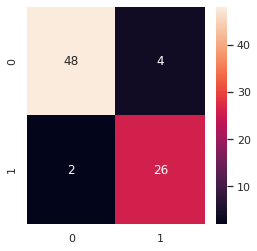

In [117]:
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, kclassifier.predict(X_test)), annot=True, fmt="d")

In [118]:
from sklearn.model_selection import cross_val_score

knn_scores = cross_val_score(kclassifier, X_train, y_train, cv=10)
print("cross_val_score: ", knn_scores.mean())

cross_val_score:  0.90625


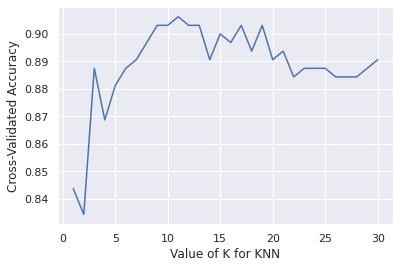

In [115]:
from sklearn.model_selection import cross_val_score

# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train,y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#print (k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [119]:
Ks = 31
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#mean_acc

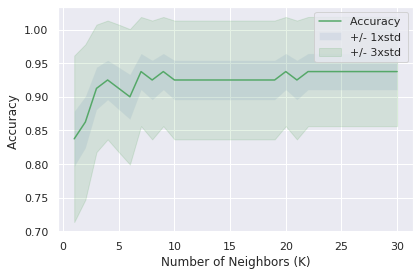

In [120]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [109]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9375 with k= 7


/home/fredsena/anaconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/fredsena/anaconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


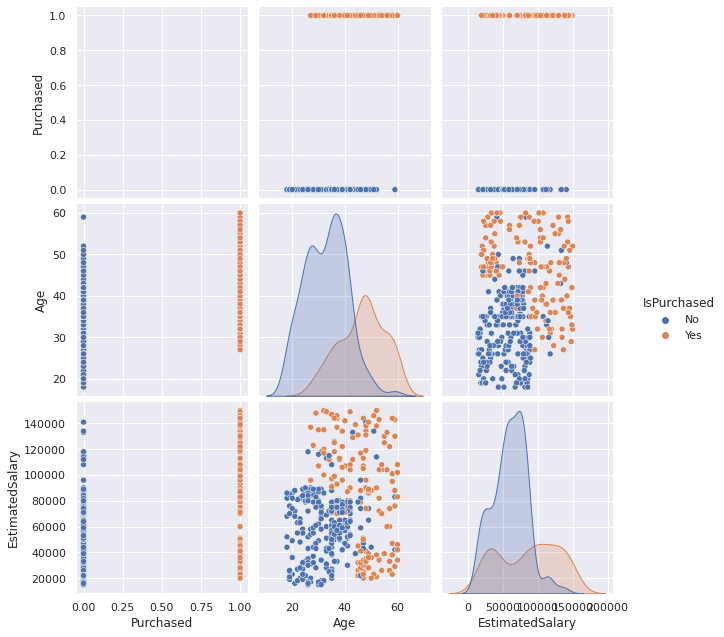

In [99]:

# df['servicecat'].replace({1:'basic', 2:'e-service', 3:'plus',4:'total'}, inplace=True)
# inplace : bool, default False
#     If True, in place. Note: this will modify any
#     other views on this object (e.g. a column from a DataFrame).
#     Returns the caller if this is True.

df_analysis = df
df_analysis['IsPurchased'] = df_analysis['Purchased']
df_analysis['IsPurchased'].replace({1:'Yes', 0:'No'}, inplace=True)

sns.pairplot(df_analysis[['Purchased','IsPurchased','Age', 'EstimatedSalary']], hue='IsPurchased', height=3)

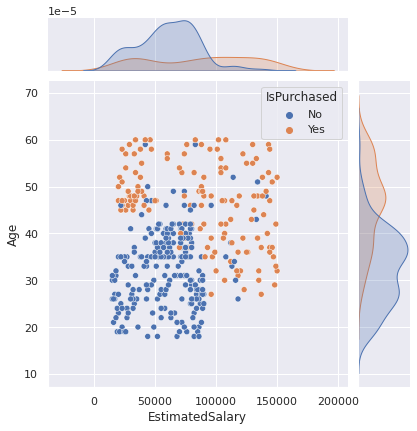

In [104]:
sns.jointplot(x="EstimatedSalary", y="Age", data=df_analysis, hue='IsPurchased')